import libraries

In [50]:
import pandas as pd
import seaborn as sns

In [128]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [52]:
data = pd.read_csv('GEDEvent_v22_1 2.csv')
data.head()

/var/folders/fv/j2glptx96zv4jxc02f5d5ff40000gn/T/ipykernel_27674/869455486.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('GEDEvent_v22_1 2.csv')


,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,dyad_new_id,dyad_name,side_a_dset_id,side_a_new_id,side_a,side_b_dset_id,side_b_new_id,side_b,number_of_sources,source_article,source_office,source_date,source_headline,source_original,where_prec,where_coordinates,where_description,adm_1,adm_2,latitude,longitude,geom_wkt,priogrid_gid,country,country_id,region,event_clarity,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,244657,IRQ-2017-1-524-322,2017,1,Clear,1,259,259,Iraq: Government,524,524,Government of Iraq - IS,116,116,Government of Iraq,234,234,IS,3,"""Agence France Presse,2017-08-01,At least 20 k...",Agence France Presse;Agence France Presse;Pajh...,2017-08-01;2017-08-01;2017-07-31,At least 20 killed in Shiite mosque attack in ...,"IS, interior ministry, security source",1,Kabul city,Iraqi embassy in Kabul,Kabul province,Kabul district,34.531094,69.162796,POINT (69.162796 34.531094),179779,Afghanistan,700,Asia,1,1,2017-07-31 00:00:00.000,2017-07-31 00:00:00.000,0,4,0,2,6,6,6,645,NaN
1,412700,IRQ-2021-1-524-145,2021,1,Clear,1,259,259,Iraq: Government,524,524,Government of Iraq - IS,116,116,Government of Iraq,234,234,IS,15,"""BBC News,2021-08-26,Explosion at Kabul airpor...",BBC News;ShamshadNews on Twitter;Reuters News;...,2021-08-26;2021-08-26;2021-08-27;2021-08-27;20...,Explosion at Kabul airport;At least 11 people ...,US officials; Taliban spokesman Zabihullah Muj...,1,Kabul international airport,Kabul airport (Abbey gate entrance),Kabul province,Kabul district,34.564444,69.217222,POINT (69.2172222 34.5644444),179779,Afghanistan,700,Asia,1,1,2021-08-26 00:00:00.000,2021-08-26 00:00:00.000,13,1,141,28,183,184,171,645,NaN
2,413023,IRQ-2021-1-524-143,2021,1,Clear,1,259,259,Iraq: Government,524,524,Government of Iraq - IS,116,116,Government of Iraq,234,234,IS,5,"""Khaama Press,2021-08-28,First US airstrike hi...",Khaama Press;Agence France Presse;Reuters News...,2021-08-28;2021-08-28;2021-08-29;2021-08-28;20...,First US airstrike hits ISIS-K fighter after T...,US central command spokesperson Captain Bill U...,1,Jalalabad town,Police District 7 of Jalalabad city,Nangarhar province,Jalalabad district,34.428844,70.455750,POINT (70.45575 34.428844),179061,Afghanistan,700,Asia,1,1,2021-08-28 00:00:00.000,2021-08-28 00:00:00.000,0,2,0,0,2,3,0,645,NaN
3,412909,IRQ-2021-1-524-144,2021,1,Clear,1,259,259,Iraq: Government,524,524,Government of Iraq - IS,116,116,Government of Iraq,234,234,IS,8,"""CNN,2021-08-29,Nine family members, including...",CNN;Reuters News;Associated Press Newswires;BB...,2021-08-29;2021-08-29;2021-08-30;2021-08-31;20...,"Nine family members, including children, kille...",relative; US Central Command; witnesses; Afgha...,1,Kabul city,Kabul city (district 15),Kabul province,Kabul district,34.531094,69.162796,POINT (69.162796 34.531094),179779,Afghanistan,700,Asia,1,1,2021-08-29 00:00:00.000,2021-08-29 00:00:00.000,0,0,10,0,10,10,9,645,NaN
4,132140,AFG-1989-1-411-2,1989,1,Clear,1,333,333,Afghanistan: Government,724,724,Government of Afghanistan - Jam'iyyat-i Islami...,130,130,Government of Afghanistan,292,292,Jam'iyyat-i Islami-yi Afghanistan,-1,"The Times 13 Jan 1989 ""Missiles and tea breaks...",NaN,NaN,NaN,Rebel source,4,Nangarhar province,Nangarhar province,Nangarhar province,NaN,34.333330,70.416670,POINT (70.41667 34.33333),179061,Afghanistan,700,Asia,1,3,1989-01-07 00:00:00.000,1989-01-13 00:00:00.000,6,0,0,0,6,6,6,700,NaN


data exploration

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293634 entries, 0 to 293633
Data columns (total 49 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 293634 non-null  int64  
 1   relid              293634 non-null  object 
 2   year               293634 non-null  int64  
 3   active_year        293634 non-null  int64  
 4   code_status        293634 non-null  object 
 5   type_of_violence   293634 non-null  int64  
 6   conflict_dset_id   293634 non-null  int64  
 7   conflict_new_id    293634 non-null  int64  
 8   conflict_name      293634 non-null  object 
 9   dyad_dset_id       293634 non-null  int64  
 10  dyad_new_id        293634 non-null  int64  
 11  dyad_name          293634 non-null  object 
 12  side_a_dset_id     293634 non-null  int64  
 13  side_a_new_id      293634 non-null  int64  
 14  side_a             293634 non-null  object 
 15  side_b_dset_id     293634 non-null  int64  
 16  si

In [54]:
data.isna().sum()

id                        0
relid                     0
year                      0
active_year               0
code_status               0
type_of_violence          0
conflict_dset_id          0
conflict_new_id           0
conflict_name             0
dyad_dset_id              0
dyad_new_id               0
dyad_name                 0
side_a_dset_id            0
side_a_new_id             0
side_a                    0
side_b_dset_id            0
side_b_new_id             0
side_b                    0
number_of_sources         0
source_article            1
source_office        103270
source_date          103270
source_headline      103270
source_original       39688
where_prec                0
where_coordinates         0
where_description      5476
adm_1                 15875
adm_2                 62951
latitude                  0
longitude                 0
geom_wkt                  0
priogrid_gid              0
country                   0
country_id                0
region              

In [55]:
#calculate number of rows 
data.shape[0]

293634

data cleaning

In [56]:
data.conflict_name.sample(20)

61542                                        Hutu - Tutsi
104096                                   Iraq: Government
194691                                  Syria: Government
93811                                      India: Kashmir
36091                             Afghanistan: Government
87632                                   India: Government
164311            Russia (Soviet Union): Caucasus Emirate
240099                                  Syria: Government
213286                                  Syria: Government
26791                             Afghanistan: Government
242219                                  Syria: Government
262049                               Syria: Islamic State
272688                                          SNA - SDF
178689              Supporters of ANC - Supporters of IFP
229894                                  Syria: Government
127221    Cartel Independiente de Acapulco - La Barredora
40249                          Afghanistan: Islamic State
103799        

In [57]:
data = data[['id', 
    #   'relid', 'code_status',
      'year', 'active_year', 'type_of_violence', # 5 years in a row are civil wars
      #  'conflict_dset_id',  'dyad_dset_id','side_a_dset_id','side_b_dset_id',
       'conflict_new_id', 'conflict_name',
       'dyad_new_id', 'dyad_name', 'side_a_new_id', 'side_a','side_b_new_id', 'side_b', 
      #  'number_of_sources','source_article', 'source_office', 'source_date', 'source_headline', 'source_original', 
       'where_prec', 'where_coordinates', # date_prec identifies the degree of precision of the date
       'where_description', 
      #  'adm_1', 'adm_2',  'priogrid_gid',
       'latitude', 'longitude',
       'geom_wkt', 'country', 'country_id', 'region',
      #  'event_clarity', 
       'date_prec', 'date_start', 'date_end', 'deaths_a',
       'deaths_b', 'deaths_civilians', 'deaths_unknown', 'best', 
      #  'high', 'low',
      #  'gwnoa', 'gwnob' # Gleditsch and Ward number for Side A or B
      ]].copy()

In [58]:
data.isna().sum()

id                      0
year                    0
active_year             0
type_of_violence        0
conflict_new_id         0
conflict_name           0
dyad_new_id             0
dyad_name               0
side_a_new_id           0
side_a                  0
side_b_new_id           0
side_b                  0
where_prec              0
where_coordinates       0
where_description    5476
latitude                0
longitude               0
geom_wkt                0
country                 0
country_id              0
region                  0
date_prec               0
date_start              0
date_end                0
deaths_a                0
deaths_b                0
deaths_civilians        0
deaths_unknown          0
best                    0
dtype: int64

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293634 entries, 0 to 293633
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 293634 non-null  int64  
 1   year               293634 non-null  int64  
 2   active_year        293634 non-null  int64  
 3   type_of_violence   293634 non-null  int64  
 4   conflict_new_id    293634 non-null  int64  
 5   conflict_name      293634 non-null  object 
 6   dyad_new_id        293634 non-null  int64  
 7   dyad_name          293634 non-null  object 
 8   side_a_new_id      293634 non-null  int64  
 9   side_a             293634 non-null  object 
 10  side_b_new_id      293634 non-null  int64  
 11  side_b             293634 non-null  object 
 12  where_prec         293634 non-null  int64  
 13  where_coordinates  293634 non-null  object 
 14  where_description  288158 non-null  object 
 15  latitude           293634 non-null  float64
 16  lo

In [60]:
#remove trailing zeroes as time is not important
data['date_start'] = pd.to_datetime(data['date_start']).dt.date.astype('datetime64')
#convert the above column to datetime format


In [62]:
# this also works to convert to datetime format
data['date_end'] = pd.to_datetime(data['date_end'])

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293634 entries, 0 to 293633
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 293634 non-null  int64         
 1   year               293634 non-null  int64         
 2   active_year        293634 non-null  int64         
 3   type_of_violence   293634 non-null  int64         
 4   conflict_new_id    293634 non-null  int64         
 5   conflict_name      293634 non-null  object        
 6   dyad_new_id        293634 non-null  int64         
 7   dyad_name          293634 non-null  object        
 8   side_a_new_id      293634 non-null  int64         
 9   side_a             293634 non-null  object        
 10  side_b_new_id      293634 non-null  int64         
 11  side_b             293634 non-null  object        
 12  where_prec         293634 non-null  int64         
 13  where_coordinates  293634 non-null  object  

In [67]:
data.isna().sum()

id                      0
year                    0
active_year             0
type_of_violence        0
conflict_new_id         0
conflict_name           0
dyad_new_id             0
dyad_name               0
side_a_new_id           0
side_a                  0
side_b_new_id           0
side_b                  0
where_prec              0
where_coordinates       0
where_description    5476
latitude                0
longitude               0
geom_wkt                0
country                 0
country_id              0
region                  0
date_prec               0
date_start              0
date_end                0
deaths_a                0
deaths_b                0
deaths_civilians        0
deaths_unknown          0
best                    0
dtype: int64

In [70]:
data['where_description'].sample(20)

#display the rows where where_description is null
data[data['where_description'].isnull()]

112526              near Sufa crossing, southern Gaza Strip
64552                                      Alindao IDP camp
184513                               Palampiddi town (area)
76787     Kalehe, Kanune and Rusamambo villages Ikobo gr...
3508                                      Rashidan district
133929    crossing of the Libramiento Sur and the road t...
206773                                               Kernaz
267835                                                Raqqa
55216                                                Teslic
199645                                               Manbej
12013                                  Dara-i-Pech district
238663                                     Damascus Suburbs
88546                                  in Chandel District.
51786                                                 Jajce
253109                             southwestern Rif Dimashq
99134                                      across the state
28876     Khan Aga area (Khanaqa-e-Malik

In [71]:
data[data['where_description'].isnull()]


,id,year,active_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,side_a_new_id,side_a,side_b_new_id,side_b,where_prec,where_coordinates,where_description,latitude,longitude,geom_wkt,country,country_id,region,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best
527,186176,1989,1,1,333,Afghanistan: Government,732,Government of Afghanistan - Hizb-i Wahdat,130,Government of Afghanistan,300,Hizb-i Wahdat,6,Afghanistan,NaN,33.000000,65.000000,POINT (65 33),Afghanistan,700,Asia,5,1989-01-01,1989-12-31,0,0,0,21,21
530,70096,1991,1,1,333,Afghanistan: Government,732,Government of Afghanistan - Hizb-i Wahdat,130,Government of Afghanistan,300,Hizb-i Wahdat,6,Afghanistan,NaN,33.000000,65.000000,POINT (65 33),Afghanistan,700,Asia,5,1991-01-01,1991-12-31,0,0,0,22,22
20927,251063,2017,1,1,333,Afghanistan: Government,735,Government of Afghanistan - Taleban,130,Government of Afghanistan,303,Taleban,4,Hilmand province,NaN,31.000000,64.000000,POINT (64 31),Afghanistan,700,Asia,2,2017-06-04,2017-06-05,0,8,0,0,8
27731,300848,2019,1,1,333,Afghanistan: Government,735,Government of Afghanistan - Taleban,130,Government of Afghanistan,303,Taleban,3,Qurghan district,NaN,37.037113,64.939385,POINT (64.939385 37.037113),Afghanistan,700,Asia,1,2019-08-29,2019-08-29,0,5,0,0,5
28010,323919,2019,1,1,333,Afghanistan: Government,735,Government of Afghanistan - Taleban,130,Government of Afghanistan,303,Taleban,3,Musa Khel district,NaN,33.589444,69.665383,POINT (69.665383 33.589444),Afghanistan,700,Asia,2,2019-09-18,2019-09-19,0,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293534,346131,2020,1,2,14623,Forces of Hadi - STC,15915,Forces of Hadi - STC,6254,Forces of Hadi,7344,STC,1,Ja‘ār town,NaN,13.223003,45.305585,POINT (45.305585 13.223003),Yemen (North Yemen),678,Middle East,1,2020-06-07,2020-06-07,0,0,0,1,1
293536,353862,2020,1,2,14623,Forces of Hadi - STC,15915,Forces of Hadi - STC,6254,Forces of Hadi,7344,STC,4,Abyan governorate,NaN,13.786202,46.141765,POINT (46.141765 13.786202),Yemen (North Yemen),678,Middle East,5,2020-06-22,2020-08-25,0,0,0,0,0
293537,346109,2020,1,2,14623,Forces of Hadi - STC,15915,Forces of Hadi - STC,6254,Forces of Hadi,7344,STC,4,Abyan governorate,NaN,13.786202,46.141765,POINT (46.141765 13.786202),Yemen (North Yemen),678,Middle East,2,2020-06-25,2020-06-26,1,1,0,52,54
293539,349114,2020,1,2,14623,Forces of Hadi - STC,15915,Forces of Hadi - STC,6254,Forces of Hadi,7344,STC,3,Al Maḩfid district,NaN,14.018470,46.755958,POINT (46.755958 14.01847),Yemen (North Yemen),678,Middle East,1,2020-07-20,2020-07-20,1,0,0,0,1


In [79]:
# impute the missing values with the value of where_coordinates and display both columns
data['where_description'] = data['where_description'].fillna(data['where_coordinates'])

In [86]:
# display both columns
data[['where_coordinates', 'where_description']].sample(10)

,where_coordinates,where_description
106325,An Nāşirīyah town,An Nāşirīyah town
240155,Qarqur town,town of al- Qarqor and its hill located on the...
226252,Damascus city,Damascus
198861,Salma village,"town of Selma, Reef Latakia."
265043,Damascus city,Yarmouk Camp
77063,Mambasa territory,Mambasa territory
214111,Aleppo town,vicinity of the Traffic Branch in Aleppo City
11111,Salimaka village,Salim Aka
27532,Gelan district,"Qarabagh, Gilan and Nawa districts."
236586,Jasim town,town of Jasem


In [87]:
# display the rows from where_descritpion and where_coordinates where the values are identical
data[data['where_description'] == data['where_coordinates']][['where_coordinates', 'where_description']]


,where_coordinates,where_description
4,Nangarhar province,Nangarhar province
5,Kunduz province,Kunduz province
7,Kabul city,Kabul city
9,Hirat province,Hirat province
10,Kabul city,Kabul city
...,...,...
293608,Gokwe town,Gokwe town
293609,Glendale town,Glendale town
293615,Shurugwi town,Shurugwi town
293629,Chipinge district,Chipinge district


In [80]:
data.isna().sum()

id                   0
year                 0
active_year          0
type_of_violence     0
conflict_new_id      0
conflict_name        0
dyad_new_id          0
dyad_name            0
side_a_new_id        0
side_a               0
side_b_new_id        0
side_b               0
where_prec           0
where_coordinates    0
where_description    0
latitude             0
longitude            0
geom_wkt             0
country              0
country_id           0
region               0
date_prec            0
date_start           0
date_end             0
deaths_a             0
deaths_b             0
deaths_civilians     0
deaths_unknown       0
best                 0
dtype: int64

In [64]:
data

,id,year,active_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,side_a_new_id,side_a,side_b_new_id,side_b,where_prec,where_coordinates,where_description,latitude,longitude,geom_wkt,country,country_id,region,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best
0,244657,2017,1,1,259,Iraq: Government,524,Government of Iraq - IS,116,Government of Iraq,234,IS,1,Kabul city,Iraqi embassy in Kabul,34.531094,69.162796,POINT (69.162796 34.531094),Afghanistan,700,Asia,1,2017-07-31,2017-07-31,0,4,0,2,6
1,412700,2021,1,1,259,Iraq: Government,524,Government of Iraq - IS,116,Government of Iraq,234,IS,1,Kabul international airport,Kabul airport (Abbey gate entrance),34.564444,69.217222,POINT (69.2172222 34.5644444),Afghanistan,700,Asia,1,2021-08-26,2021-08-26,13,1,141,28,183
2,413023,2021,1,1,259,Iraq: Government,524,Government of Iraq - IS,116,Government of Iraq,234,IS,1,Jalalabad town,Police District 7 of Jalalabad city,34.428844,70.455750,POINT (70.45575 34.428844),Afghanistan,700,Asia,1,2021-08-28,2021-08-28,0,2,0,0,2
3,412909,2021,1,1,259,Iraq: Government,524,Government of Iraq - IS,116,Government of Iraq,234,IS,1,Kabul city,Kabul city (district 15),34.531094,69.162796,POINT (69.162796 34.531094),Afghanistan,700,Asia,1,2021-08-29,2021-08-29,0,0,10,0,10
4,132140,1989,1,1,333,Afghanistan: Government,724,Government of Afghanistan - Jam'iyyat-i Islami...,130,Government of Afghanistan,292,Jam'iyyat-i Islami-yi Afghanistan,4,Nangarhar province,Nangarhar province,34.333330,70.416670,POINT (70.41667 34.33333),Afghanistan,700,Asia,3,1989-01-07,1989-01-13,6,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293629,15525,1989,1,3,562,Renamo - Civilians,1029,Renamo - Civilians,498,Renamo,1,Civilians,3,Chipinge district,Chipinge district,-20.500000,32.500000,POINT (32.5 -20.5),Zimbabwe (Rhodesia),552,Africa,3,1989-03-18,1989-03-24,0,0,9,0,9
293630,15524,1989,1,3,562,Renamo - Civilians,1029,Renamo - Civilians,498,Renamo,1,Civilians,5,"Eastern Zimbabwe, near the Mozambique border",Zimbabwe eastern (Near the eastern border with...,-19.000000,32.500000,POINT (32.5 -19),Zimbabwe (Rhodesia),552,Africa,3,1989-07-09,1989-07-15,0,0,9,0,9
293631,15245,1990,1,3,562,Renamo - Civilians,1029,Renamo - Civilians,498,Renamo,1,Civilians,1,Nyamaropa village,Nyamaropa village,-18.000000,32.833333,POINT (32.833333 -18),Zimbabwe (Rhodesia),552,Africa,2,1990-06-07,1990-06-10,0,0,7,0,7
293632,15516,1990,1,3,562,Renamo - Civilians,1029,Renamo - Civilians,498,Renamo,1,Civilians,5,"Eastern Zimbabwe, near the Mozambique border",Zimbabwe eastern (Pungwe communal lands settle...,-19.000000,32.500000,POINT (32.5 -19),Zimbabwe (Rhodesia),552,Africa,3,1990-11-17,1990-11-23,0,0,1,0,1


Violence by IS

In [161]:
data[(data['side_b'] == 'IS') & (data['country'] == 'Afghanistan')]


,id,year,active_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,side_a_new_id,side_a,side_b_new_id,side_b,where_prec,where_coordinates,where_description,latitude,longitude,geom_wkt,country,country_id,region,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best
0,244657,2017,1,1,259,Iraq: Government,524,Government of Iraq - IS,116,Government of Iraq,234,IS,1,Kabul city,Iraqi embassy in Kabul,34.531094,69.162796,POINT (69.162796 34.531094),Afghanistan,700,Asia,1,2017-07-31,2017-07-31,0,4,0,2,6
1,412700,2021,1,1,259,Iraq: Government,524,Government of Iraq - IS,116,Government of Iraq,234,IS,1,Kabul international airport,Kabul airport (Abbey gate entrance),34.564444,69.217222,POINT (69.2172222 34.5644444),Afghanistan,700,Asia,1,2021-08-26,2021-08-26,13,1,141,28,183
2,413023,2021,1,1,259,Iraq: Government,524,Government of Iraq - IS,116,Government of Iraq,234,IS,1,Jalalabad town,Police District 7 of Jalalabad city,34.428844,70.455750,POINT (70.45575 34.428844),Afghanistan,700,Asia,1,2021-08-28,2021-08-28,0,2,0,0,2
3,412909,2021,1,1,259,Iraq: Government,524,Government of Iraq - IS,116,Government of Iraq,234,IS,1,Kabul city,Kabul city (district 15),34.531094,69.162796,POINT (69.162796 34.531094),Afghanistan,700,Asia,1,2021-08-29,2021-08-29,0,0,10,0,10
39567,194473,2015,1,1,13637,Afghanistan: Islamic State,14320,Government of Afghanistan - IS,130,Government of Afghanistan,234,IS,1,Azan village,Azan area of Kajaki district (Azankarez area),32.265700,64.990200,POINT (64.9902 32.2657),Afghanistan,700,Asia,1,2015-02-09,2015-02-09,0,6,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41195,424273,2021,1,1,13637,Afghanistan: Islamic State,14320,Government of Afghanistan - IS,130,Government of Afghanistan,234,IS,1,Kabul city,Tank Logar area of Kabul's 8th District,34.531094,69.162796,POINT (69.162796 34.531094),Afghanistan,700,Asia,1,2021-12-14,2021-12-14,0,0,1,0,1
41196,424261,2021,1,1,13637,Afghanistan: Islamic State,14320,Government of Afghanistan - IS,130,Government of Afghanistan,234,IS,1,Jalalabad town,Qasba area of PD 1 Jalalabad,34.428844,70.455750,POINT (70.45575 34.428844),Afghanistan,700,Asia,1,2021-12-20,2021-12-20,1,3,1,0,5
41197,425034,2021,1,1,13637,Afghanistan: Islamic State,14320,Government of Afghanistan - IS,130,Government of Afghanistan,234,IS,2,Shinwar district (Ghani Khel),Ghani Khel area of Shinwar District in #Nangarhar,34.189706,70.830429,POINT (70.830429 34.189706),Afghanistan,700,Asia,1,2021-12-21,2021-12-21,4,0,0,0,4
41198,424995,2021,1,1,13637,Afghanistan: Islamic State,14320,Government of Afghanistan - IS,130,Government of Afghanistan,234,IS,1,Kabul city,gate of a passport office in the Afghan capita...,34.531094,69.162796,POINT (69.162796 34.531094),Afghanistan,700,Asia,1,2021-12-21,2021-12-21,0,1,0,0,1


In [159]:
#dataframe with IS 
IS = data[data['side_b'] == 'IS']
IS

,id,year,active_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,side_a_new_id,side_a,side_b_new_id,side_b,where_prec,where_coordinates,where_description,latitude,longitude,geom_wkt,country,country_id,region,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best
0,244657,2017,1,1,259,Iraq: Government,524,Government of Iraq - IS,116,Government of Iraq,234,IS,1,Kabul city,Iraqi embassy in Kabul,34.531094,69.162796,POINT (69.162796 34.531094),Afghanistan,700,Asia,1,2017-07-31,2017-07-31,0,4,0,2,6
1,412700,2021,1,1,259,Iraq: Government,524,Government of Iraq - IS,116,Government of Iraq,234,IS,1,Kabul international airport,Kabul airport (Abbey gate entrance),34.564444,69.217222,POINT (69.2172222 34.5644444),Afghanistan,700,Asia,1,2021-08-26,2021-08-26,13,1,141,28,183
2,413023,2021,1,1,259,Iraq: Government,524,Government of Iraq - IS,116,Government of Iraq,234,IS,1,Jalalabad town,Police District 7 of Jalalabad city,34.428844,70.455750,POINT (70.45575 34.428844),Afghanistan,700,Asia,1,2021-08-28,2021-08-28,0,2,0,0,2
3,412909,2021,1,1,259,Iraq: Government,524,Government of Iraq - IS,116,Government of Iraq,234,IS,1,Kabul city,Kabul city (district 15),34.531094,69.162796,POINT (69.162796 34.531094),Afghanistan,700,Asia,1,2021-08-29,2021-08-29,0,0,10,0,10
39567,194473,2015,1,1,13637,Afghanistan: Islamic State,14320,Government of Afghanistan - IS,130,Government of Afghanistan,234,IS,1,Azan village,Azan area of Kajaki district (Azankarez area),32.265700,64.990200,POINT (64.9902 32.2657),Afghanistan,700,Asia,1,2015-02-09,2015-02-09,0,6,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293497,322757,2019,1,2,14512,AQAP - IS,15782,AQAP - IS,881,AQAP,234,IS,4,al-Bayḑā’ governorate,al-Bayḑā’ governorate,14.341660,45.394420,POINT (45.39442 14.34166),Yemen (North Yemen),678,Middle East,2,2019-12-04,2019-12-09,0,2,0,0,2
293498,322755,2019,1,2,14512,AQAP - IS,15782,AQAP - IS,881,AQAP,234,IS,2,Al Qayfa area,Qifa area of Bayda,14.535000,44.800000,POINT (44.8 14.535),Yemen (North Yemen),678,Middle East,2,2019-12-07,2019-12-09,1,0,0,0,1
293499,331467,2020,0,2,14512,AQAP - IS,15782,AQAP - IS,881,AQAP,234,IS,2,Al Qayfa area,"Luqah, Tabbat Abu al-Ghayth and al-Awajah in Q...",14.535000,44.800000,POINT (44.8 14.535),Yemen (North Yemen),678,Middle East,1,2020-02-03,2020-02-03,3,0,0,0,3
293500,331469,2020,0,2,14512,AQAP - IS,15782,AQAP - IS,881,AQAP,234,IS,1,Laqāḩ village,"Luqah, Tabbat Abu al-Ghayth and al-Awajah in Q...",14.540001,44.832138,POINT (44.832138 14.540001),Yemen (North Yemen),678,Middle East,1,2020-02-03,2020-02-03,3,0,0,0,3


In [102]:
# select and calculate the sum of best column where side_b value == 'IS'
killings_by_IS = data[data['side_b'] == 'IS']['best'].sum()




161885

In [167]:
data[data['side_b'] == 'IS'].groupby(['year', 'country'])['best', 'deaths_a', 'deaths_b', 'deaths_civilians'].sum().reset_index()

/var/folders/fv/j2glptx96zv4jxc02f5d5ff40000gn/T/ipykernel_27674/1245011490.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data[data['side_b'] == 'IS'].groupby(['year', 'country'])['best', 'deaths_a', 'deaths_b', 'deaths_civilians'].sum().reset_index()


,year,country,best,deaths_a,deaths_b,deaths_civilians
0,2004,Iraq,2422,535,361,94
1,2005,Iraq,2208,614,796,140
2,2006,Iraq,3732,588,2351,128
3,2007,Iraq,1766,311,1022,72
4,2008,Iraq,1246,268,227,109
5,2009,Iraq,1036,250,117,56
6,2010,Iraq,989,407,145,133
7,2011,Iraq,837,336,90,84
8,2012,Iraq,565,230,56,57
9,2013,Iraq,1870,607,216,65


In [163]:
# group killings by IS by year and country
killings_by_IS = data[data['side_b'] == 'IS'].groupby(['year', 'country'])['best'].sum().reset_index()
killings_by_IS

,year,country,best
0,2004,Iraq,2422
1,2005,Iraq,2208
2,2006,Iraq,3732
3,2007,Iraq,1766
4,2008,Iraq,1246
5,2009,Iraq,1036
6,2010,Iraq,989
7,2011,Iraq,837
8,2012,Iraq,565
9,2013,Iraq,1870


In [166]:
# sum the killings by year and country for killings_by_IS
IS_killings_by_country = killings_by_IS.groupby(['country'])['best'].sum().reset_index()

,country,best
0,Afghanistan,10307
1,Algeria,54
2,Australia,1
3,Bangladesh,93
4,Belgium,5
5,Burkina Faso,429
6,Cameroon,616
7,Chad,797
8,DR Congo (Zaire),1428
9,Egypt,3420


civil wars

In [135]:
# Calculate the cumulative sum of killings, deaths_a, and deaths_b for each country
cumulative_killings = data.groupby('country')['best'].cumsum()
cumulative_deaths_a = data.groupby('country')['deaths_a'].cumsum()
cumulative_deaths_b = data.groupby('country')['deaths_b'].cumsum()

# Create a mask to check for three or more consecutive active years until 'active_year' equals 0
mask = (
    data.groupby('country')['active_year'].transform(lambda x: (x == 1).rolling(3, min_periods=3).sum().gt(2) & x.ne(0))
)

# Filter the data based on the cumulative numbers and the consecutive years condition
civil_wars_lambda = data[(cumulative_killings >= 500) & (cumulative_deaths_a >= 100) & (cumulative_deaths_b >= 100) & mask]
civil_wars_lambda

,id,year,active_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,side_a_new_id,side_a,side_b_new_id,side_b,where_prec,where_coordinates,where_description,latitude,longitude,geom_wkt,country,country_id,region,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best
40,134120,1989,1,1,333,Afghanistan: Government,724,Government of Afghanistan - Jam'iyyat-i Islami...,130,Government of Afghanistan,292,Jam'iyyat-i Islami-yi Afghanistan,4,Hilmand province,Hilmand province,31.000000,64.000000,POINT (64 31),Afghanistan,700,Asia,1,1989-08-16,1989-08-16,0,17,1,0,18
41,134123,1989,1,1,333,Afghanistan: Government,724,Government of Afghanistan - Jam'iyyat-i Islami...,130,Government of Afghanistan,292,Jam'iyyat-i Islami-yi Afghanistan,1,Chaharikar town,Chaharikar town,35.015900,69.174100,POINT (69.1741 35.0159),Afghanistan,700,Asia,1,1989-08-22,1989-08-22,0,0,0,7,7
42,134132,1989,1,1,333,Afghanistan: Government,724,Government of Afghanistan - Jam'iyyat-i Islami...,130,Government of Afghanistan,292,Jam'iyyat-i Islami-yi Afghanistan,1,Kabul city,Kabul city (Khairkhanna suburb of),34.531094,69.162796,POINT (69.162796 34.531094),Afghanistan,700,Asia,1,1989-09-05,1989-09-05,0,0,8,0,8
43,134138,1989,1,1,333,Afghanistan: Government,724,Government of Afghanistan - Jam'iyyat-i Islami...,130,Government of Afghanistan,292,Jam'iyyat-i Islami-yi Afghanistan,1,Shindand town,Shindand town,33.302944,62.147400,POINT (62.1474 33.302944),Afghanistan,700,Asia,1,1989-09-11,1989-09-11,0,9,3,0,12
44,134144,1989,1,1,333,Afghanistan: Government,724,Government of Afghanistan - Jam'iyyat-i Islami...,130,Government of Afghanistan,292,Jam'iyyat-i Islami-yi Afghanistan,1,Bagram town,Bagram town,34.967461,69.295097,POINT (69.295097 34.967461),Afghanistan,700,Asia,2,1989-09-11,1989-09-13,5,2,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293546,370739,2020,1,2,14623,Forces of Hadi - STC,15915,Forces of Hadi - STC,6254,Forces of Hadi,7344,STC,2,Zinjibār town,north of the provincial capital Zinjibar,13.128712,45.380728,POINT (45.380728 13.128712),Yemen (North Yemen),678,Middle East,1,2020-11-17,2020-11-17,8,0,0,0,8
293547,370844,2020,1,2,14623,Forces of Hadi - STC,15915,Forces of Hadi - STC,6254,Forces of Hadi,7344,STC,2,Tariyah village,"Al-Tariya, north of the provincial seat of Zin...",13.221667,45.409722,POINT (45.409722 13.221667),Yemen (North Yemen),678,Middle East,1,2020-11-27,2020-11-27,5,9,0,0,14
293548,374447,2020,1,2,14623,Forces of Hadi - STC,15915,Forces of Hadi - STC,6254,Forces of Hadi,7344,STC,2,Zinjibār town,"near the town of Zinjibar,",13.128712,45.380728,POINT (45.380728 13.128712),Yemen (North Yemen),678,Middle East,2,2020-11-30,2020-12-01,0,2,0,0,2
293549,370872,2020,1,2,14623,Forces of Hadi - STC,15915,Forces of Hadi - STC,6254,Forces of Hadi,7344,STC,2,Ja‘ār town,Ja‘ār town,13.223003,45.305585,POINT (45.305585 13.223003),Yemen (North Yemen),678,Middle East,1,2020-12-04,2020-12-04,1,13,0,0,14


In [136]:
# Calculate the cumulative sum of killings, deaths_a, and deaths_b for each country
cumulative_killings = data.groupby('country')['best'].cumsum()
cumulative_deaths_a = data.groupby('country')['deaths_a'].cumsum()
cumulative_deaths_b = data.groupby('country')['deaths_b'].cumsum()

# Create a mask to check for three or more consecutive active years
mask = (
    (data['active_year'].eq(1) & data.groupby('country')['active_year'].shift().eq(1) & data.groupby('country')['active_year'].shift(2).eq(1))
    .groupby(data['country'])
    .transform('any')
    & ~data['side_b'].str.contains('Government') # exclude government side_b
)

# Filter the data based on the cumulative numbers and the consecutive years condition
civil_wars = data[(cumulative_killings >= 500) & (cumulative_deaths_a >= 100) & (cumulative_deaths_b >= 100) & mask]
civil_wars

,id,year,active_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,side_a_new_id,side_a,side_b_new_id,side_b,where_prec,where_coordinates,where_description,latitude,longitude,geom_wkt,country,country_id,region,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best
40,134120,1989,1,1,333,Afghanistan: Government,724,Government of Afghanistan - Jam'iyyat-i Islami...,130,Government of Afghanistan,292,Jam'iyyat-i Islami-yi Afghanistan,4,Hilmand province,Hilmand province,31.000000,64.000000,POINT (64 31),Afghanistan,700,Asia,1,1989-08-16,1989-08-16,0,17,1,0,18
41,134123,1989,1,1,333,Afghanistan: Government,724,Government of Afghanistan - Jam'iyyat-i Islami...,130,Government of Afghanistan,292,Jam'iyyat-i Islami-yi Afghanistan,1,Chaharikar town,Chaharikar town,35.015900,69.174100,POINT (69.1741 35.0159),Afghanistan,700,Asia,1,1989-08-22,1989-08-22,0,0,0,7,7
42,134132,1989,1,1,333,Afghanistan: Government,724,Government of Afghanistan - Jam'iyyat-i Islami...,130,Government of Afghanistan,292,Jam'iyyat-i Islami-yi Afghanistan,1,Kabul city,Kabul city (Khairkhanna suburb of),34.531094,69.162796,POINT (69.162796 34.531094),Afghanistan,700,Asia,1,1989-09-05,1989-09-05,0,0,8,0,8
43,134138,1989,1,1,333,Afghanistan: Government,724,Government of Afghanistan - Jam'iyyat-i Islami...,130,Government of Afghanistan,292,Jam'iyyat-i Islami-yi Afghanistan,1,Shindand town,Shindand town,33.302944,62.147400,POINT (62.1474 33.302944),Afghanistan,700,Asia,1,1989-09-11,1989-09-11,0,9,3,0,12
44,134144,1989,1,1,333,Afghanistan: Government,724,Government of Afghanistan - Jam'iyyat-i Islami...,130,Government of Afghanistan,292,Jam'iyyat-i Islami-yi Afghanistan,1,Bagram town,Bagram town,34.967461,69.295097,POINT (69.295097 34.967461),Afghanistan,700,Asia,2,1989-09-11,1989-09-13,5,2,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293550,374450,2020,1,2,14623,Forces of Hadi - STC,15915,Forces of Hadi - STC,6254,Forces of Hadi,7344,STC,2,Ash Shaykh Salim village,near the town of Sheikh Salem,13.182210,45.476980,POINT (45.47698 13.18221),Yemen (North Yemen),678,Middle East,1,2020-12-07,2020-12-07,2,0,0,0,2
293551,405563,2021,0,2,14623,Forces of Hadi - STC,15915,Forces of Hadi - STC,6254,Forces of Hadi,7344,STC,4,Shabwah governorate,Shabwa,15.000000,47.000000,POINT (47 15),Yemen (North Yemen),678,Middle East,4,2021-06-02,2021-07-02,0,2,0,0,2
293552,405561,2021,0,2,14623,Forces of Hadi - STC,15915,Forces of Hadi - STC,6254,Forces of Hadi,7344,STC,1,Lawdar town,Lawdar city,13.882824,45.868586,POINT (45.868586 13.882824),Yemen (North Yemen),678,Middle East,1,2021-07-02,2021-07-02,2,0,2,0,4
293553,412905,2021,0,2,14623,Forces of Hadi - STC,15915,Forces of Hadi - STC,6254,Forces of Hadi,7344,STC,1,Al Jalilah village,As Sahah mosque in Al Jalilah area in Ad Dhalee.,13.728991,44.742948,POINT (44.742948 13.728991),Yemen (North Yemen),678,Middle East,1,2021-08-19,2021-08-19,0,0,0,0,0


In [132]:
# filter data for civil wars to show dyad_name, side_a, side_b, best, deaths_a, deaths_b, date_start, date_end, country
civil_wars[['dyad_name', 'side_a', 'side_b', 'best', 'deaths_a', 'deaths_b', 'date_start', 'date_end', 'country']]

,dyad_name,side_a,side_b,best,deaths_a,deaths_b,date_start,date_end,country
40,Government of Afghanistan - Jam'iyyat-i Islami...,Government of Afghanistan,Jam'iyyat-i Islami-yi Afghanistan,18,0,17,1989-08-16,1989-08-16,Afghanistan
41,Government of Afghanistan - Jam'iyyat-i Islami...,Government of Afghanistan,Jam'iyyat-i Islami-yi Afghanistan,7,0,0,1989-08-22,1989-08-22,Afghanistan
42,Government of Afghanistan - Jam'iyyat-i Islami...,Government of Afghanistan,Jam'iyyat-i Islami-yi Afghanistan,8,0,0,1989-09-05,1989-09-05,Afghanistan
43,Government of Afghanistan - Jam'iyyat-i Islami...,Government of Afghanistan,Jam'iyyat-i Islami-yi Afghanistan,12,0,9,1989-09-11,1989-09-11,Afghanistan
44,Government of Afghanistan - Jam'iyyat-i Islami...,Government of Afghanistan,Jam'iyyat-i Islami-yi Afghanistan,7,5,2,1989-09-11,1989-09-13,Afghanistan
...,...,...,...,...,...,...,...,...,...
293550,Forces of Hadi - STC,Forces of Hadi,STC,2,2,0,2020-12-07,2020-12-07,Yemen (North Yemen)
293551,Forces of Hadi - STC,Forces of Hadi,STC,2,0,2,2021-06-02,2021-07-02,Yemen (North Yemen)
293552,Forces of Hadi - STC,Forces of Hadi,STC,4,2,0,2021-07-02,2021-07-02,Yemen (North Yemen)
293553,Forces of Hadi - STC,Forces of Hadi,STC,0,0,0,2021-08-19,2021-08-19,Yemen (North Yemen)


In [140]:
# Filter the data for rows with three or more consecutive years of active_year being 1
consecutive_years_mask = (
    data.groupby('country')['active_year']
        .apply(lambda x: (x.eq(1).rolling(3, min_periods=3).sum() >= 3) & (x.shift(-2).eq(0)))
        .reset_index(drop=True)
)

# Apply the filter and calculate the cumulative sums
cumulative_killings = data.loc[consecutive_years_mask, 'best'].groupby(data['country']).cumsum()
cumulative_deaths_a = data.loc[consecutive_years_mask, 'deaths_a'].groupby(data['country']).cumsum()
cumulative_deaths_b = data.loc[consecutive_years_mask, 'deaths_b'].groupby(data['country']).cumsum()





In [144]:
cumulative_killings


365         1
366         2
377         4
378         6
519         7
         ... 
293498    196
293549    210
293550    212
293613      3
293614    200
Name: best, Length: 2006, dtype: int64

In [142]:
# Filter the data based on the cumulative numbers and the consecutive years condition
civil_wars_loc = data.loc[consecutive_years_mask & (cumulative_killings >= 500) & (cumulative_deaths_a >= 100) & (cumulative_deaths_b >= 100)]
civil_wars_loc.head()

,id,year,active_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,side_a_new_id,side_a,side_b_new_id,side_b,where_prec,where_coordinates,where_description,latitude,longitude,geom_wkt,country,country_id,region,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best
77190,24302,2008,1,2,4600,CNDP - PARECO,5210,CNDP - PARECO,426,CNDP,896,PARECO,4,Nord Kivu province,Nord Kivu Province,-0.666667,28.750000,POINT (28.75 -0.666667),DR Congo (Zaire),490,Africa,1,2008-06-03,2008-06-03,7,2,0,0,9
77394,20220,2000,1,2,4689,Mayi Mayi - RCD,5299,Mayi Mayi - RCD,648,Mayi Mayi,424,RCD,2,Uvira town,Uvira town (near),-3.406667,29.145833,POINT (29.145833 -3.406667),DR Congo (Zaire),490,Africa,2,2000-11-03,2000-11-07,0,0,0,8,8
77395,23353,2000,1,2,4689,Mayi Mayi - RCD,5299,Mayi Mayi - RCD,648,Mayi Mayi,424,RCD,1,On the road 30 km south of Uvira town,Fizi territory (Main road 30 km (20 miles) sou...,-3.670000,29.140000,POINT (29.14 -3.67),DR Congo (Zaire),490,Africa,2,2000-12-12,2000-12-14,15,1,0,0,16
77442,24261,1997,1,2,4732,AFDL - ALiR,5342,AFDL - ALiR,422,AFDL,1128,ALiR,1,Mweso location,Mwezo location,-1.116667,29.033333,POINT (29.033333 -1.116667),DR Congo (Zaire),490,Africa,1,1997-03-11,1997-03-11,0,1,0,0,1
77467,24100,1996,1,2,4734,Hunde - Hutu,5344,Hunde - Hutu,914,Hunde,915,Hutu,3,Masisi zone,Masisi zone (Northern Masisi),-1.400000,28.816667,POINT (28.816667 -1.4),DR Congo (Zaire),490,Africa,4,1996-06-01,1996-06-30,57,5,0,0,62


In [145]:
consecutive_years_mask = (
    data.groupby('country')['active_year']
        .apply(lambda x: (x.eq(1).rolling(3, min_periods=3).sum() >= 3) & (x.shift(-2).eq(0)))
        .reset_index(drop=True)
)

# Apply the filter and calculate the cumulative sums
cumulative_killings = data.loc[consecutive_years_mask, 'best'].groupby(data['country']).cumsum()
cumulative_deaths_a = data.loc[consecutive_years_mask, 'deaths_a'].groupby(data['country']).cumsum()
cumulative_deaths_b = data.loc[consecutive_years_mask, 'deaths_b'].groupby(data['country']).cumsum()

# Create the civil_wars_2 dataframe
civil_wars_2 = data.loc[consecutive_years_mask].copy()
civil_wars_2['cumulative_killings'] = cumulative_killings
civil_wars_2['cumulative_deaths_a'] = cumulative_deaths_a
civil_wars_2['cumulative_deaths_b'] = cumulative_deaths_b
civil_wars_2.head()

,id,year,active_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,side_a_new_id,side_a,side_b_new_id,side_b,where_prec,where_coordinates,where_description,latitude,longitude,geom_wkt,country,country_id,region,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,cumulative_killings,cumulative_deaths_a,cumulative_deaths_b
365,171714,2011,1,1,333,Afghanistan: Government,726,Government of Afghanistan - Hizb-i Islami-yi A...,130,Government of Afghanistan,299,Hizb-i Islami-yi Afghanistan,3,Nahrin district,Nahrin district (Ab Khana area),35.987508,69.022563,POINT (69.022563 35.987508),Afghanistan,700,Asia,1,2011-11-16,2011-11-16,0,1,0,0,1,1,0,1
366,171877,2011,1,1,333,Afghanistan: Government,726,Government of Afghanistan - Hizb-i Islami-yi A...,130,Government of Afghanistan,299,Hizb-i Islami-yi Afghanistan,1,Nawer Kalay (Chamkanay) town,Chamkani District headquarters,33.804400,69.810200,POINT (69.8102 33.8044),Afghanistan,700,Asia,1,2011-12-05,2011-12-05,1,0,0,0,1,2,1,1
377,81204,2013,1,1,333,Afghanistan: Government,726,Government of Afghanistan - Hizb-i Islami-yi A...,130,Government of Afghanistan,299,Hizb-i Islami-yi Afghanistan,1,Aybak (Samangan) town,Aybak town (Sheryak area),36.265488,68.016388,POINT (68.016388 36.265488),Afghanistan,700,Asia,1,2013-11-04,2013-11-04,0,2,0,0,2,4,1,3
378,81624,2013,1,1,333,Afghanistan: Government,726,Government of Afghanistan - Hizb-i Islami-yi A...,130,Government of Afghanistan,299,Hizb-i Islami-yi Afghanistan,2,Wazir village,Wazir area,34.196796,70.159393,POINT (70.159393 34.196796),Afghanistan,700,Asia,1,2013-12-17,2013-12-17,0,2,0,0,2,6,1,5
519,131165,1991,1,1,333,Afghanistan: Government,727,Government of Afghanistan - Hizb-i Islami-yi A...,130,Government of Afghanistan,294,Hizb-i Islami-yi Afghanistan - Khalis faction,4,Paktya province,Paktia province,33.666667,69.333330,POINT (69.33333 33.666667),Afghanistan,700,Asia,1,1991-12-18,1991-12-18,0,0,0,1,1,7,1,5


In [146]:
civil_wars_2.groupby('country')['year'].count().sort_values(ascending=False).head(10)

country
India                       161
DR Congo (Zaire)            158
Nigeria                     121
Pakistan                     78
Sudan                        64
Myanmar (Burma)              64
Mexico                       62
Central African Republic     61
Syria                        58
Somalia                      58
Name: year, dtype: int64

In [143]:
civil_wars_loc.groupby('country')['year'].count().sort_values(ascending=False).head(10)

country
DR Congo (Zaire)    90
Nigeria             61
Kenya               32
Ethiopia            21
Sudan               11
Mali                10
Name: year, dtype: int64

In [138]:
civil_wars_lambda.groupby('country')['year'].count().sort_values(ascending=False).head(10)

country
Syria                 80887
Afghanistan           41204
India                 15187
Mexico                10793
Iraq                   8217
Bosnia-Herzegovina     8175
Colombia               6942
Somalia                5790
Pakistan               5647
Turkey                 5501
Name: year, dtype: int64

In [137]:
# the deadliest civil wars
civil_wars.groupby('country')['year'].count().sort_values(ascending=False).head(10)

country
Syria                 81046
Afghanistan           41303
India                 16047
Mexico                11054
Bosnia-Herzegovina     8210
Iraq                   8155
Colombia               7416
Somalia                6072
DR Congo (Zaire)       5974
Pakistan               5951
Name: year, dtype: int64

In [ ]:
Syria                 81046
Afghanistan           41303
India                 16047
Mexico                11054
Bosnia-Herzegovina     8210
Iraq                   8155
Colombia               7416
Somalia                6072
DR Congo (Zaire)       5974
Pakistan               5951

In [ ]:
# show longest conflicts
# 

individual countries

<AxesSubplot:title={'center':'Iraq: Fatalities by year'}, xlabel='year'>

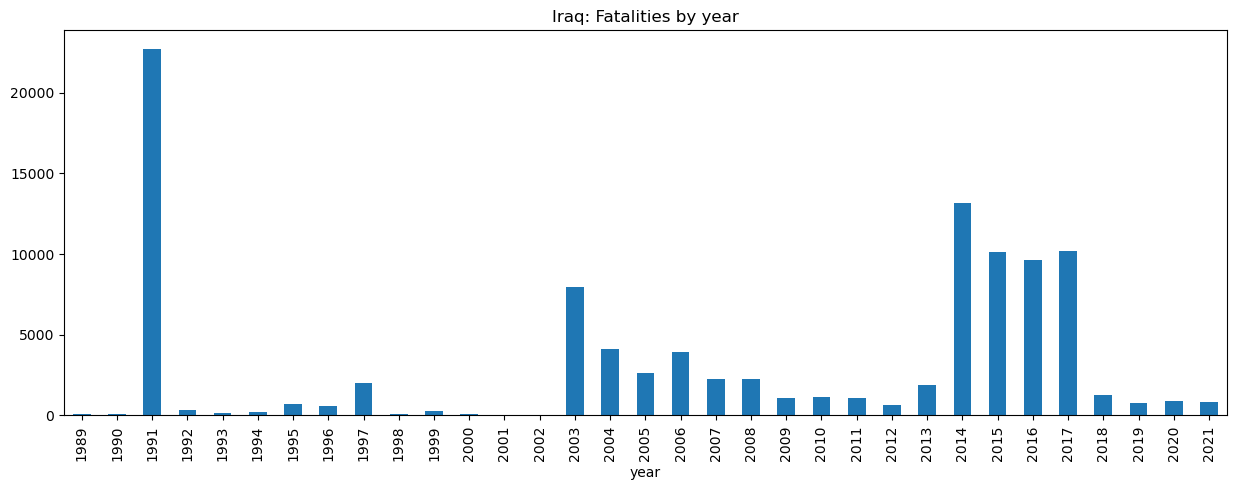

In [149]:
iraq = (data['country'] == 'Iraq') & (data['type_of_violence'] == 1)
data[iraq].groupby('year')['best'].sum()
# chart Iraq fatalities by year
# data[iraq].groupby('year')['best'].sum().plot(kind='bar', figsize=(15, 5), title='Iraq: Fatalities by year')



In [151]:
# show data for iraq variable in 1991
iraq_1991 = (data['country'] == 'Iraq') & (data['type_of_violence'] == 1) & (data['year'] == 1991)
data[iraq_1991].sample(10)




,id,year,active_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,side_a_new_id,side_a,side_b_new_id,side_b,where_prec,where_coordinates,where_description,latitude,longitude,geom_wkt,country,country_id,region,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best
110066,145084,1991,1,1,371,Iraq - Kuwait,799,Government of Iraq - Government of Kuwait,116,Government of Iraq,125,Government of Kuwait,6,Iraq,Iraq,33.000000,44.000000,POINT (44 33),Iraq,645,Middle East,1,1991-01-23,1991-01-23,0,300,0,0,300
109527,422058,1991,1,1,354,Turkey: Kurdistan,781,Government of Turkey - PKK,115,Government of Turkey,323,PKK,5,Northern Iraq,Northern Iraq,36.166667,42.583333,POINT (42.583333 36.166667),Iraq,645,Middle East,1,1991-04-01,1991-04-01,6,0,0,0,6
110053,145068,1991,1,1,371,Iraq - Kuwait,799,Government of Iraq - Government of Kuwait,116,Government of Iraq,125,Government of Kuwait,1,Baghdād city,Baghdad city,33.340582,44.400876,POINT (44.400876 33.340582),Iraq,645,Middle East,1,1991-01-17,1991-01-17,0,0,0,23,23
103930,145155,1991,1,1,259,Iraq: Government,521,Government of Iraq - SCIRI,116,Government of Iraq,231,SCIRI,1,al Başrah town,Basra town,30.533016,47.797466,POINT (47.797466 30.533016),Iraq,645,Middle East,1,1991-04-24,1991-04-24,0,0,0,22,22
110079,145108,1991,1,1,371,Iraq - Kuwait,799,Government of Iraq - Government of Kuwait,116,Government of Iraq,125,Government of Kuwait,1,Baghdād city,Baghdad city,33.340582,44.400876,POINT (44.400876 33.340582),Iraq,645,Middle East,1,1991-02-13,1991-02-13,0,0,0,288,288
110047,144906,1991,1,1,371,Iraq - Kuwait,799,Government of Iraq - Government of Kuwait,116,Government of Iraq,125,Government of Kuwait,4,Al Qādisīyah province,Qadassiya province,31.583333,45.000000,POINT (45 31.583333),Iraq,645,Middle East,3,1991-01-16,1991-01-22,0,0,0,4,4
110064,145082,1991,1,1,371,Iraq - Kuwait,799,Government of Iraq - Government of Kuwait,116,Government of Iraq,125,Government of Kuwait,5,Iraq-Jordan border,"Iraq-Jordan border (Nahdaen area, 30 km inside...",32.740802,39.009104,POINT (39.009104 32.740802),Iraq,645,Middle East,1,1991-01-22,1991-01-22,0,0,4,0,4
109462,145152,1991,1,1,271,Iraq: Kurdistan,565,Government of Iraq - PUK,116,Government of Iraq,261,PUK,5,Road between Chamchamal town and Qādir Karam town,Road from Qadir Karam to Chamchamal,35.332702,44.790764,POINT (44.790764 35.332702),Iraq,645,Middle East,1,1991-11-05,1991-11-05,0,5,0,0,5
110041,145065,1991,1,1,371,Iraq - Kuwait,799,Government of Iraq - Government of Kuwait,116,Government of Iraq,125,Government of Kuwait,1,Baghdād city,Baghdad city,33.340582,44.400876,POINT (44.400876 33.340582),Iraq,645,Middle East,1,1991-01-13,1991-01-13,0,0,403,0,403
110046,144905,1991,1,1,371,Iraq - Kuwait,799,Government of Iraq - Government of Kuwait,116,Government of Iraq,125,Government of Kuwait,4,Al Anbār province,Anbar province,33.000000,41.750000,POINT (41.75 33),Iraq,645,Middle East,3,1991-01-16,1991-01-22,0,0,0,10,10


In [110]:
#filters data for Syria
syria = data['country'] == 'Syria'
data[syria]

,id,year,active_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,side_a_new_id,side_a,side_b_new_id,side_b,where_prec,where_coordinates,where_description,latitude,longitude,geom_wkt,country,country_id,region,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best
189211,177142,2004,1,1,234,Israel: Palestine,477,Government of Israel - Hamas,121,Government of Israel,209,Hamas,1,Damascus city,"Damascus, Syria",33.513364,36.291575,POINT (36.291575 33.513364),Syria,652,Middle East,1,2004-09-26,2004-09-26,0,1,0,0,1
189212,314095,2019,1,1,234,Israel: Palestine,478,Government of Israel - PIJ,121,Government of Israel,208,PIJ,1,Damascus city,al-Mazzeh Villat area west of Damascus,33.513364,36.291575,POINT (36.291575 33.513364),Syria,652,Middle East,1,2019-11-12,2019-11-12,0,0,0,2,2
189213,337938,2020,0,1,234,Israel: Palestine,478,Government of Israel - PIJ,121,Government of Israel,208,PIJ,2,Damascus International airport,near Damascus international airport,33.410556,36.514444,POINT (36.514444 33.410556),Syria,652,Middle East,1,2020-02-23,2020-02-23,0,2,0,4,6
189214,372692,2013,1,1,259,Iraq: Government,524,Government of Iraq - IS,116,Government of Iraq,234,IS,1,Al Yarubiyah town,Yarubia crossing,36.811380,42.062060,POINT (42.06206 36.81138),Syria,652,Middle East,1,2013-10-09,2013-10-09,0,0,0,0,0
189215,355186,2014,1,1,259,Iraq: Government,524,Government of Iraq - IS,116,Government of Iraq,234,IS,2,Albu Kamal town,Bukmal,34.450000,40.918611,POINT (40.918611 34.45),Syria,652,Middle East,1,2014-03-05,2014-03-05,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274155,164294,2014,1,2,15310,"Army of Maoata al-Islami, Authenticity and Dev...",16749,"Army of Maoata al-Islami, Authenticity and Dev...",8050,"Army of Maoata al-Islami, Authenticity and Dev...",234,IS,2,Shuhayl town,Shuhail,35.086496,40.452324,POINT (40.452324 35.086496),Syria,652,Middle East,1,2014-05-14,2014-05-14,1,0,0,0,1
274156,164290,2014,1,2,15310,"Army of Maoata al-Islami, Authenticity and Dev...",16749,"Army of Maoata al-Islami, Authenticity and Dev...",8050,"Army of Maoata al-Islami, Authenticity and Dev...",234,IS,2,Shuhayl town,"al-Shehel, which is an taken as the headquarte...",35.086496,40.452324,POINT (40.452324 35.086496),Syria,652,Middle East,1,2014-05-16,2014-05-16,10,1,3,4,18
274157,398056,2014,1,2,15310,"Army of Maoata al-Islami, Authenticity and Dev...",16749,"Army of Maoata al-Islami, Authenticity and Dev...",8050,"Army of Maoata al-Islami, Authenticity and Dev...",234,IS,1,Shuhayl town,Shuhail,35.086496,40.452324,POINT (40.452324 35.086496),Syria,652,Middle East,1,2014-05-17,2014-05-17,1,0,3,0,4
274158,294477,2014,1,2,15310,"Army of Maoata al-Islami, Authenticity and Dev...",16749,"Army of Maoata al-Islami, Authenticity and Dev...",8050,"Army of Maoata al-Islami, Authenticity and Dev...",234,IS,1,Shuhayl town,"Al-Shuhail town of Deir Ezzor countryside,",35.086496,40.452324,POINT (40.452324 35.086496),Syria,652,Middle East,1,2014-05-19,2014-05-19,0,0,0,3,3


In [8]:
# @calculate the sum of all values in deaths_b
data['deaths_b'].sum()

# data['Event_Type'].value_counts()

698749

In [9]:
#sort by year   
year = data.sort_values(by=['year']).head()
year
# data['year'].value_counts()

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,dyad_new_id,dyad_name,side_a_dset_id,side_a_new_id,side_a,side_b_dset_id,side_b_new_id,side_b,number_of_sources,source_article,source_office,source_date,source_headline,source_original,where_prec,where_coordinates,where_description,adm_1,adm_2,latitude,longitude,geom_wkt,priogrid_gid,country,country_id,region,event_clarity,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
185494,72461,SRI-1989-3-1123-58,1989,1,Clear,3,281,511,JVP - Civilians,281,978,JVP - Civilians,281,281,JVP,9999,1,Civilians,-1,"Reuters, 14 September 1989",NaN,NaN,NaN,military sources,6,Sri Lanka,Sri Lanka,NaN,NaN,7.000000,81.000000,POINT (0 0),129961,Sri Lanka,780,Asia,2,2,1989-09-13 00:00:00.000,1989-09-14 00:00:00.000,0,0,0,0,0,19,0,NaN,NaN
185405,76820,SRI-1989-3-780-5,1989,1,Clear,3,145,489,Government of Sri Lanka - Civilians,145,956,Government of Sri Lanka - Civilians,145,145,Government of Sri Lanka,9999,1,Civilians,-1,"Reuters, 5 March 1989",NaN,NaN,NaN,LTTE,3,Polonnaruwa district,Polonnaruwa district,North Central province,Polonnaruwa district,8.000000,81.000000,POINT (81 8),141643,Sri Lanka,780,Asia,2,2,1989-03-03 00:00:00.000,1989-03-05 00:00:00.000,0,0,3,0,3,16,3,780.0,NaN
185404,77770,SRI-1989-3-780-4,1989,1,Clear,3,145,489,Government of Sri Lanka - Civilians,145,956,Government of Sri Lanka - Civilians,145,145,Government of Sri Lanka,9999,1,Civilians,-1,"Reuters, 11 February 1989",NaN,NaN,NaN,residents,1,Suriyawewa locality,"Suriyawewa, 30 km north of Hambantota",Southern province,Hambantota district,6.321100,80.997200,POINT (80.9972 6.3211),138762,Sri Lanka,780,Asia,1,1,1989-02-10 00:00:00.000,1989-02-10 00:00:00.000,0,0,0,0,0,6,0,780.0,NaN
185403,77769,SRI-1989-3-780-1,1989,1,Clear,3,145,489,Government of Sri Lanka - Civilians,145,956,Government of Sri Lanka - Civilians,145,145,Government of Sri Lanka,9999,1,Civilians,-1,"R, 1994-01-03",NaN,NaN,NaN,"see ""what""",2,Embilipitiya town,"Suriyakande, 165 km (100 miles) south of Colom...",Sabaragamuwa province,Ratnapura district,6.343889,80.848889,POINT (80.848889 6.343889),138762,Sri Lanka,780,Asia,2,5,1989-01-01 00:00:00.000,1989-12-31 00:00:00.000,0,0,15,0,15,300,15,780.0,NaN
185401,75690,SRI-1989-1-687-2,1989,1,Clear,1,352,352,Sri Lanka (Ceylon): Eelam,778,778,Government of Sri Lanka - EPRLF,145,145,Government of Sri Lanka,322,322,EPRLF,-1,R 12/3/1989 SEVENTEEN SRI LANKAN SOLDIERS KILL...,NaN,NaN,NaN,military sources,1,Madukanda town,Madukanda town,North Eastern province,Vavuniya district,8.742300,80.534500,POINT (80.5345 8.7423),142362,Sri Lanka,780,Asia,1,1,1989-12-03 00:00:00.000,1989-12-03 00:00:00.000,17,0,0,0,17,17,17,780.0,NaN


In [10]:
data['year'].value_counts()

2014    25885
2013    24458
2015    19551
2012    18451
2016    16796
2021    16609
2017    15851
2019    13244
2018    13065
2020    12692
2011     7599
1992     7321
2009     7035
2007     6695
1994     6617
1993     6504
2002     6435
2008     6279
2010     6223
2004     6153
2000     5432
2005     5334
2006     5243
2003     4333
2001     4140
1999     4079
1995     3875
1998     3716
1990     3196
1996     2858
1991     2855
1997     2569
1989     2541
Name: year, dtype: int64

In [11]:
# 
data['active_year']

0         1
1         1
2         1
3         1
4         1
         ..
293629    1
293630    1
293631    1
293632    1
293633    1
Name: active_year, Length: 293634, dtype: int64

<AxesSubplot:xlabel='side_a', ylabel='deaths_b'>

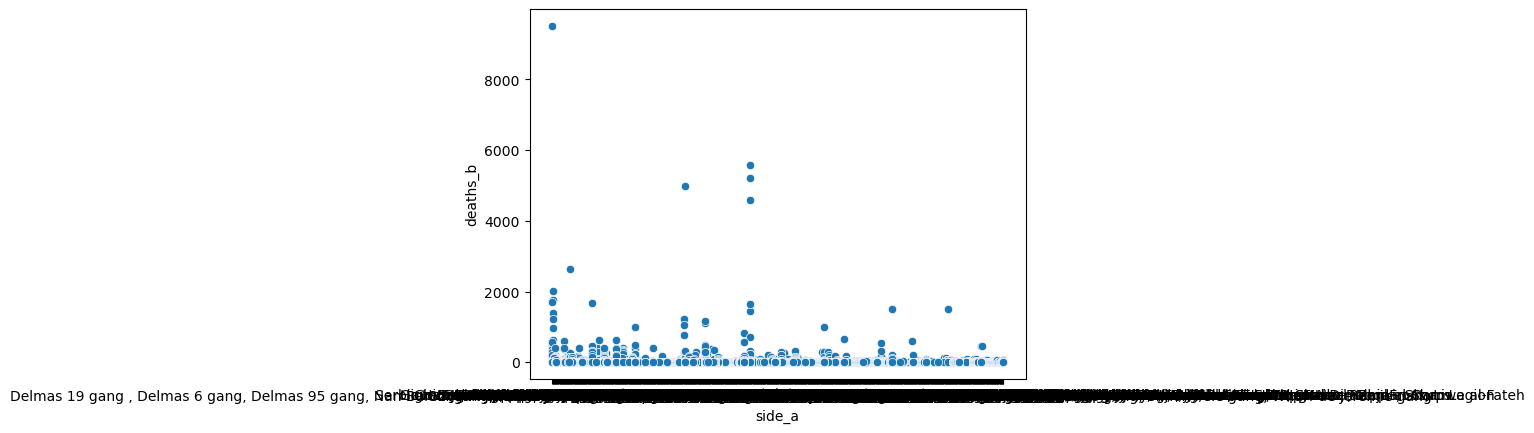

In [12]:
# make sns scatter plot of year and deaths_b
sns.scatterplot(x='side_a', y='deaths_b', data=data)



In [13]:
#groupby country and sum deaths_b
grouped = data.groupby('country')['deaths_b'].sum()
grouped


country
Afghanistan                        182674
Albania                                 4
Algeria                             15065
Angola                               7677
Argentina                               0
Armenia                                60
Australia                               1
Austria                                 0
Azerbaijan                           5317
Bahrain                                 0
Bangladesh                            375
Belgium                                 3
Benin                                   0
Bhutan                                  0
Bolivia                                27
Bosnia-Herzegovina                  10512
Botswana                                0
Brazil                                234
Burkina Faso                         1122
Burundi                              5559
Cambodia (Kampuchea)                  691
Cameroon                             3084
Canada                                 17
Central African Republic  

In [15]:
# group by country and years and sum deaths_b
grouped_year = data.groupby(['country', 'year'])['deaths_b'].sum().sort_values(ascending=False)
grouped_year.head(20)


country      year
Afghanistan  2021    30824
Syria        2014    28609
Afghanistan  2019    23815
Syria        2013    20437
             2015    20331
Afghanistan  2018    19877
Syria        2016    18424
Afghanistan  2017    16238
             2016    14537
             2020    13345
             2015    12048
Iraq         1991    10513
Syria        2017    10487
             2012     8882
Iraq         2014     7760
             2015     7595
Sri Lanka    2008     7148
Afghanistan  2014     6884
Syria        2018     6229
Sri Lanka    1991     5302
Name: deaths_b, dtype: int64